<a href="https://colab.research.google.com/github/KaramSahoo/Expression_detection/blob/main/Expressions_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random

In [ ]:
!unzip archive.zip

In [16]:
img_array = cv2.imread("train/0/Training_10315441.jpg")

In [17]:
img_array.shape

(48, 48, 3)

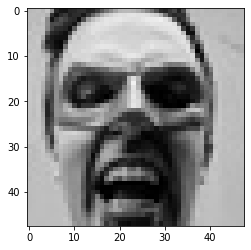

In [18]:
plt.imshow(img_array)

In [19]:
Datadirectory = "train/"

In [21]:
classes = ["0", "1", "2", "3", "4", "5", "6"]

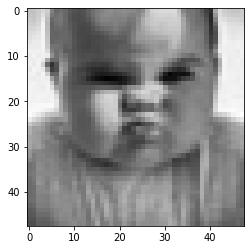

In [23]:
for category in classes:
  path = os.path.join(Datadirectory, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img))
    plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
    plt.show()
    break
  break

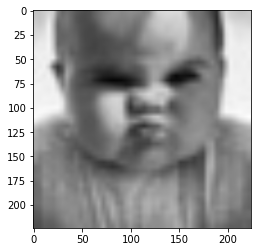

In [24]:
img_size = 224
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [27]:
new_array.shape

(224, 224, 3)

In [32]:
training_data = []

def create_training_data():
  for category in classes:
    path = os.path.join(Datadirectory, category)
    class_num = Classes.index(category)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, img))
        new_array = cv2.resize(img_array, (img_size, img_size))
        training_data.append([new_array, class_num])
      except Exception as e:
        pass

In [33]:
create_training_data()

In [35]:
print(len(training_data))

28709


In [42]:
random.shuffle(training_data)